Test notebook

In [35]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.25.2', 'qiskit': '0.44.2', 'qiskit-aer': '0.12.2', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.20.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

Test

In [1]:
from qiskit import QuantumCircuit

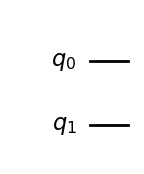

In [3]:
qc = QuantumCircuit(2)
qc.draw("mpl")

Add token

In [1]:
# Add IBM account
import os
from qiskit import IBMQ
print(os.environ.get("IBM_API_KEY"))
IBMQ.save_account(os.environ.get("IBM_API_KEY"), overwrite=True)
IBMQ.load_account()

5c0b682cfce97bd5e7b2b6fbfebe3bccdf4c7af501f5743db91f025b35fddc251d9ec9724aa59d067bb4bbb65d29217ff58eb12c0aefabb03d2c04d55b965bc6


/tmp/ipykernel_2751/3137698669.py:5: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account(os.environ.get("IBM_API_KEY"), overwrite=True)
/tmp/ipykernel_2751/3137698669.py:5: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account(os.environ.get("IBM_API_KEY"), overwrite=True)


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

Simulate the Q circuit

In [10]:
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram

In [31]:
def execute_circuit(qc): # returns the probabilities 
    simulator = Aer.get_backend("statevector_simulator")
    job = execute(qc, simulator, shots="1024")
    result = job.result()
    counts = result.get_counts()
    # plot_histogram(counts)
    return counts


Entanglement

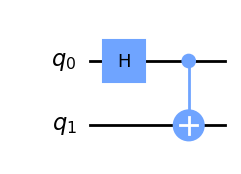

In [25]:
qc = QuantumCircuit(2) 
qc.h(0)
qc.cx(0, 1)
# qc.draw()
qc.draw("mpl")

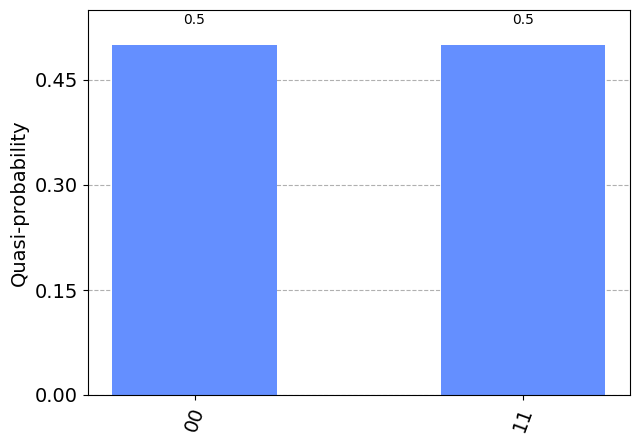

In [29]:
# Execute circuit
counts = execute_circuit(qc)
plot_histogram(counts)

Superposition

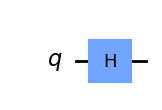

In [38]:
qc = QuantumCircuit(1)
qc.h(0)
qc.draw("mpl")


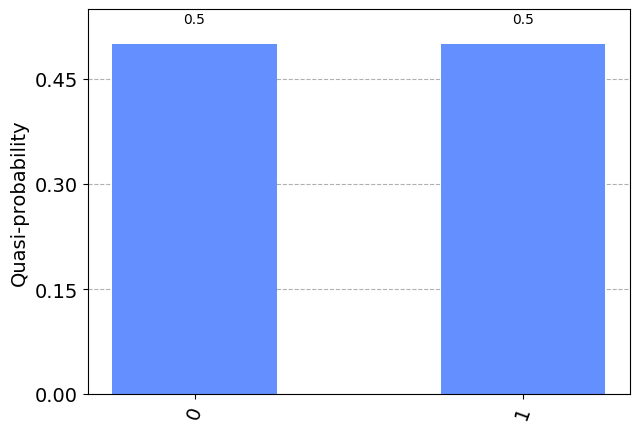

In [39]:

counts = execute_circuit(qc)
plot_histogram(counts)


Quantum Encoding

In [4]:
from qiskit import QuantumCircuit
import math

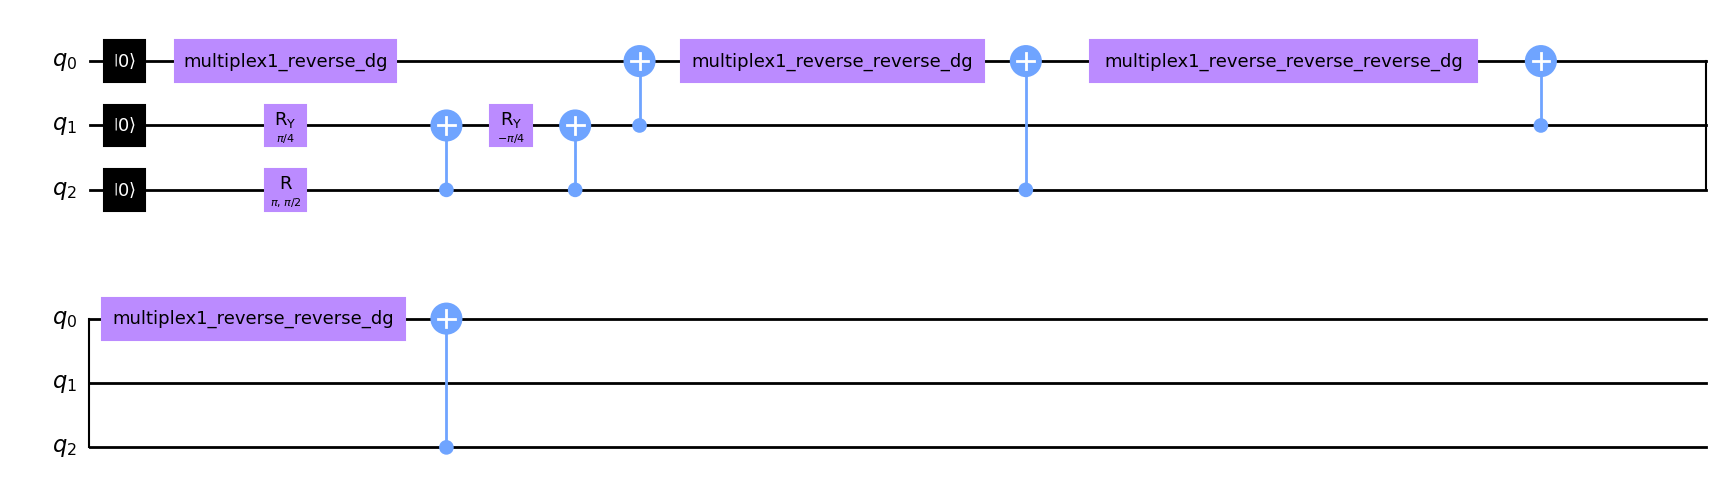

In [6]:

desired_state = [
    0,
    0,
    0,
    0,
    0,
    1 / math.sqrt(2),
    0,
    1 / math.sqrt(2)]

qc = QuantumCircuit(3)
qc.initialize(desired_state, [0,1,2])
qc.decompose().decompose().decompose().decompose().decompose().draw("mpl")

In [ ]:
desired_state = [
    1 / math.sqrt(15.25) * 1.5,
    0,
    1 / math.sqrt(15.25) * -2,
    1 / math.sqrt(15.25) * 3]

qc = QuantumCircuit(2)
qc.initialize(desired_state, [0,1])

qc.decompose().decompose().decompose().decompose().decompose().draw()

In [ ]:
qc = QuantumCircuit(3)
qc.ry(0, 0)
qc.ry(2*math.pi/4, 1)
qc.ry(2*math.pi/2, 2)
qc.draw()

In [ ]:
from qiskit.circuit.library import EfficientSU2
circuit = EfficientSU2(num_qubits=3, reps=1, insert_barriers=True)
circuit.decompose().draw()